In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
p = sns.color_palette()

In [110]:
face_train = pd.read_csv('./sample/train_face.txt', 
                        sep='\t', 
                        header=None, 
                        names=['photo_id', 'faces'])

In [111]:
user_item_train = pd.read_csv('./sample/train_interaction.txt', 
                             sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click', 'like', 'follow', 'time', 'playing_time', 'duration_time'])

In [112]:
text_train = pd.read_csv('./sample/train_text.txt',
                       sep='\t',
                       header=None,
                       names=['photo_id', 'cover_words'])

In [113]:
face_test = pd.read_csv('./sample/test_face.txt', 
                        sep='\t', 
                        header=None, 
                        names=['photo_id', 'faces'])

In [114]:
user_item_test = pd.read_csv('./sample/test_interaction.txt', 
                             sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'time', 'duration_time'])

In [115]:
text_test = pd.read_csv('./sample/test_text.txt',
                       sep='\t',
                       header=None,
                       names=['photo_id', 'cover_words'])

In [116]:
user_item_train['click'].mean()

0.2023378950092898

In [117]:
user_item_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078622 entries, 0 to 2078621
Data columns (total 8 columns):
user_id          int64
photo_id         int64
click            int64
like             int64
follow           int64
time             int64
playing_time     int64
duration_time    int64
dtypes: int64(8)
memory usage: 126.9 MB


In [118]:
user_item_train['duration_time'].describe()

count    2.078622e+06
mean     1.988872e+01
std      2.745234e+01
min      0.000000e+00
25%      1.100000e+01
50%      1.100000e+01
75%      1.700000e+01
max      3.100000e+03
Name: duration_time, dtype: float64

In [119]:
user_item_train

,user_id,photo_id,click,like,follow,time,playing_time,duration_time
0,2,1574258,0,0,0,761101936481,0,17
1,2,7372212,0,0,0,761078878694,0,17
2,2,5362722,0,0,0,761072886486,0,11
3,2,3827112,0,0,0,761079482382,0,46
4,2,5869774,0,0,0,761102215487,0,37
5,2,6507578,0,0,0,761072092678,0,57
6,2,3310863,0,0,0,761070614301,0,11
7,2,2700937,1,0,0,761069384790,24,22
8,2,3731590,0,0,0,761079687252,0,2
9,2,6189469,0,0,0,761102249846,0,33


In [120]:
time_df = user_item_train['time']
user_item_train['time'] = (time_df-time_df.min())/(time_df.max()-time_df.min())

In [121]:
lower, higher = time_df.min(), time_df.max()


In [122]:
user_item_train['like'].mean()

0.002995734674221672

In [123]:
user_item_train['follow'].mean()

0.0009626569910257853

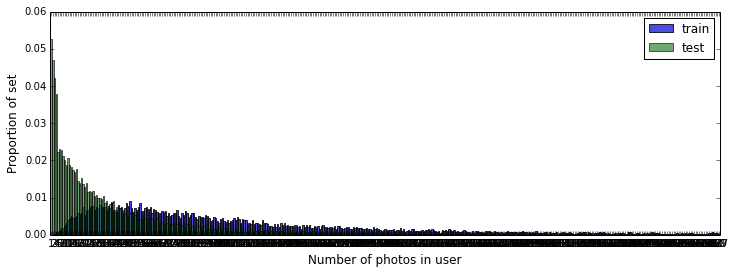

In [124]:
sizes_train = user_item_train.groupby('user_id')['photo_id'].count().value_counts()
sizes_test = user_item_test.groupby('user_id')['photo_id'].count().value_counts()
sizes_train = sizes_train / np.sum(sizes_train)
sizes_test = sizes_test / np.sum(sizes_test)

plt.figure(figsize=(12,4))
sns.barplot(sizes_train.index, sizes_train.values, alpha=0.8, color=p[0], label='train')
sns.barplot(sizes_test.index, sizes_test.values, alpha=0.6, color=p[1], label='test')
plt.legend()
plt.xlabel('Number of photos in user', fontsize=12)
plt.ylabel('Proportion of set', fontsize=12)

In [125]:
photo_intersection_prop = 1. * len(set(user_item_train.photo_id.unique()) & set(user_item_test.photo_id.unique())) / len(user_item_test.photo_id.unique())

In [126]:
photo_intersection_prop

0.0

In [127]:
t = user_item_train.loc[(user_item_train['click'] == 1) & (user_item_train['like'] == 1)]

In [128]:
user_item_train.groupby(['user_id'])

In [129]:
def add_user_feature(group):
    # group is pandas.core.frame.DataFrame
    # DataFrame.size != DataFrame.count
    n = group.shape[0] * 1.
    group['display_num'] = group.shape[0]
    group['click_num'] = group.click.sum()
    group['like_num'] = group.like.sum()
    group['follow_num'] = group.follow.sum()
    group['click_ratio'] = group['click_num'] / n
    group['like_ratio'] = group['like_num'] / n
    group['follow_ratio'] = group['follow_num'] / n
    group['playing_sum'] = group.playing_time.sum()
    group['playing_ratio'] = group['playing_sum'] / group.duration_time.sum()
    return group[['user_id', 'display_num', 'click_num', 'like_num', 'follow_num', 'playing_sum', 'click_ratio', 'like_ratio', 'follow_ratio', 'playing_ratio']]

In [130]:
users = pd.DataFrame()
users['user_id'] = user_item_train['user_id']

users['display_num'] = user_item_train['user_id'].groupby(user_item_train['user_id']).transform('count')
users['click_num'] = user_item_train['click'].groupby(user_item_train['user_id']).transform('sum')
users['like_num'] = user_item_train['like'].groupby(user_item_train['user_id']).transform('sum')
users['follow_num'] = user_item_train['follow'].groupby(user_item_train['user_id']).transform('sum')
users['playing_sum'] = user_item_train['playing_time'].groupby(user_item_train['user_id']).transform('sum')
users['duration_sum'] = user_item_train['duration_time'].groupby(user_item_train['user_id']).transform('sum')
users['click_ratio'] = user_item_train['click'].groupby(user_item_train['user_id']).transform('mean')
users['like_ratio'] = user_item_train['like'].groupby(user_item_train['user_id']).transform('mean')
users['follow_ratio'] = user_item_train['follow'].groupby(user_item_train['user_id']).transform('mean')
users['playing_ratio'] = users['playing_sum'] / users['duration_sum']


In [132]:
users.drop_duplicates(inplace=True)

In [136]:
import numpy as np
import scipy as sp
from scipy import sparse as ssp
from scipy.stats import spearmanr
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

In [137]:
user_features = ['display_num', 'click_num', 'like_num', 'follow_num', 'playing_sum', 'click_ratio', 'like_ratio', 'follow_ratio', 'playing_ratio']
user_item_train = pd.merge(user_item_train, users,
                          how='inner',
                          on=['user_id'])

In [138]:
user_item_train.display_num.describe()

count    2.078622e+06
mean     2.774591e+02
std      2.640130e+02
min      1.000000e+01
25%      1.080000e+02
50%      1.950000e+02
75%      3.500000e+02
max      1.944000e+03
Name: display_num, dtype: float64

In [139]:
import gc
gc.collect()


117

In [140]:
corrscore = spearmanr(user_item_train['click'], user_item_train['click_ratio'])
print(corrscore)

SpearmanrResult(correlation=0.3000391490895373, pvalue=0.0)


In [141]:
corrscore = spearmanr(user_item_train['click'], user_item_train['like_ratio'])
print(corrscore)

SpearmanrResult(correlation=0.030244975416974046, pvalue=0.0)


In [142]:
corrscore = spearmanr(user_item_train['click'], user_item_train['follow_ratio'])
print(corrscore)

SpearmanrResult(correlation=-6.572900620837345e-05, pvalue=0.9245020772929361)


In [143]:
corrscore = spearmanr(user_item_train['click'], user_item_train['playing_ratio'])
print(corrscore)

SpearmanrResult(correlation=0.2607557696331477, pvalue=0.0)


In [144]:
corrscore = spearmanr(user_item_train['click'], user_item_train['click_num'])
print(corrscore)

SpearmanrResult(correlation=0.08294383476962568, pvalue=0.0)


In [145]:
corrscore = spearmanr(user_item_train['click'], user_item_train['like_num'])
print(corrscore)

SpearmanrResult(correlation=0.024520313998902706, pvalue=7.749839689110636e-274)


In [146]:
corrscore = spearmanr(user_item_train['click'], user_item_train['follow_num'])
print(corrscore)

SpearmanrResult(correlation=-0.0035471662713904115, pvalue=3.152168331505878e-07)


In [147]:
corrscore = spearmanr(user_item_train['click'], user_item_train['playing_sum'])
print(corrscore)

SpearmanrResult(correlation=0.09803708931168237, pvalue=0.0)


In [148]:
corrscore = spearmanr(user_item_train['click'], user_item_train['time'])
print(corrscore)

SpearmanrResult(correlation=-0.0008692829339778059, pvalue=0.2101031682843476)


In [149]:
corrscore = spearmanr(user_item_train['click'], user_item_train['display_num'])
print(corrscore)

SpearmanrResult(correlation=-0.1608706680447173, pvalue=0.0)


In [150]:
user_item_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078622 entries, 0 to 2078621
Data columns (total 18 columns):
user_id          int64
photo_id         int64
click            int64
like             int64
follow           int64
time             float64
playing_time     int64
duration_time    int64
display_num      int64
click_num        int64
like_num         int64
follow_num       int64
playing_sum      int64
duration_sum     int64
click_ratio      float64
like_ratio       float64
follow_ratio     float64
playing_ratio    float64
dtypes: float64(5), int64(13)
memory usage: 301.3 MB


In [151]:
user_item_train.head()

,user_id,photo_id,click,like,follow,time,playing_time,duration_time,display_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,follow_ratio,playing_ratio
0,2,1574258,0,0,0,0.823436,0,17,203,34,0,1,579,4495,0.167488,0.0,0.004926,0.12881
1,2,7372212,0,0,0,0.646017,0,17,203,34,0,1,579,4495,0.167488,0.0,0.004926,0.12881
2,2,5362722,0,0,0,0.599910,0,11,203,34,0,1,579,4495,0.167488,0.0,0.004926,0.12881
3,2,3827112,0,0,0,0.650662,0,46,203,34,0,1,579,4495,0.167488,0.0,0.004926,0.12881
4,2,5869774,0,0,0,0.825582,0,37,203,34,0,1,579,4495,0.167488,0.0,0.004926,0.12881


In [152]:
y = user_item_train['click'].values

In [153]:
input_features = ['user_id', 'photo_id', 'time', 'duration_time'] + user_features
user_item_train = user_item_train[input_features]

In [154]:
user_item_train.head()

,user_id,photo_id,time,duration_time,display_num,click_num,like_num,follow_num,playing_sum,click_ratio,like_ratio,follow_ratio,playing_ratio
0,2,1574258,0.823436,17,203,34,0,1,579,0.167488,0.0,0.004926,0.12881
1,2,7372212,0.646017,17,203,34,0,1,579,0.167488,0.0,0.004926,0.12881
2,2,5362722,0.599910,11,203,34,0,1,579,0.167488,0.0,0.004926,0.12881
3,2,3827112,0.650662,46,203,34,0,1,579,0.167488,0.0,0.004926,0.12881
4,2,5869774,0.825582,37,203,34,0,1,579,0.167488,0.0,0.004926,0.12881


In [155]:
time_df = user_item_test['time']
user_item_test['time'] = (time_df-time_df.min())/(time_df.max()-time_df.min())

In [156]:
user_item_test.head()

,user_id,photo_id,time,duration_time
0,2,9080838,0.902552,140
1,3,7752961,0.886913,17
2,3,8580441,0.944226,11
3,3,8467347,0.946224,11
4,3,8764584,0.591434,17


In [157]:
user_item_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654153 entries, 0 to 654152
Data columns (total 4 columns):
user_id          654153 non-null int64
photo_id         654153 non-null int64
time             654153 non-null float64
duration_time    654153 non-null int64
dtypes: float64(1), int64(3)
memory usage: 20.0 MB


In [158]:
user_item_test = pd.merge(user_item_test, users,
                          how='inner',
                          on=['user_id'])

In [159]:
user_item_test.head()

,user_id,photo_id,time,duration_time,display_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,follow_ratio,playing_ratio
0,2,9080838,0.902552,140,203,34,0,1,579,4495,0.167488,0.0,0.004926,0.128810
1,3,7752961,0.886913,17,366,37,0,0,507,8136,0.101093,0.0,0.000000,0.062316
2,3,8580441,0.944226,11,366,37,0,0,507,8136,0.101093,0.0,0.000000,0.062316
3,3,8467347,0.946224,11,366,37,0,0,507,8136,0.101093,0.0,0.000000,0.062316
4,3,8764584,0.591434,17,366,37,0,0,507,8136,0.101093,0.0,0.000000,0.062316


In [160]:
import gc
gc.collect()

724

In [161]:
# user_item_train.drop(['photo_id'], axis=1, inplace=True)

In [162]:
user_item_train.head()

,user_id,photo_id,time,duration_time,display_num,click_num,like_num,follow_num,playing_sum,click_ratio,like_ratio,follow_ratio,playing_ratio
0,2,1574258,0.823436,17,203,34,0,1,579,0.167488,0.0,0.004926,0.12881
1,2,7372212,0.646017,17,203,34,0,1,579,0.167488,0.0,0.004926,0.12881
2,2,5362722,0.599910,11,203,34,0,1,579,0.167488,0.0,0.004926,0.12881
3,2,3827112,0.650662,46,203,34,0,1,579,0.167488,0.0,0.004926,0.12881
4,2,5869774,0.825582,37,203,34,0,1,579,0.167488,0.0,0.004926,0.12881


离散特征的编码分为两种情况：
 - 离散特征的取值之间没有大小的意义，比如color：[red,blue],那么就使用one-hot编码
 - 离散特征的取值有大小的意义，比如size:[X,XL,XXL],那么就使用数值的映射{X:1,XL:2,XXL:3}

In [163]:
X = user_item_train.as_matrix()

In [164]:
np.sum(np.isnan(X))

0

In [165]:
del user_item_train
gc.collect()

615

In [166]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score, accuracy_score


In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [168]:
%%time
clf = LogisticRegression(C=10,random_state=1)
clf.fit(X_train, y_train)
print clf.score(X_test, y_test)

0.797193814653695
CPU times: user 7.2 s, sys: 403 ms, total: 7.6 s
Wall time: 7.64 s


In [169]:
%%time
scores = cross_val_score(clf, X, y, cv=5)
print scores

[0.78861748 0.79709904 0.79704853 0.79766143 0.79766335]
CPU times: user 49 s, sys: 3.79 s, total: 52.8 s
Wall time: 52.9 s


In [171]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.01)


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score, accuracy_score

from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


names = ["Logistic Regression", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting Decision Tree", "XGBoost"]
classifiers = [
    LogisticRegression(C=10),
    svm.SVC(kernel="linear", C=0.025),
    svm.SVC(gamma=0.01, C=10),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, min_samples_leaf=9),
    XGBClassifier()]

for name, clf in zip(names,classifiers):
    clf.fit(X_train, y_train)
    print "{:31} 测试集acc/recall: {:15}/{:15} 训练集acc/recall: {:15}/{:15}".format(name, 
        accuracy_score(y_test, clf.predict(X_test)), recall_score(y_test, clf.predict(X_test), average='macro'), 
        accuracy_score(y_train, clf.predict(X_train)), recall_score(y_train, clf.predict(X_train), average='micro'))
    
for name, clf in zip(names, classifiers):
    try: 
        importances = clf.feature_importances_
        indices = np.argsort(importances)[::-1]
        print '{}特征权值分布为: '.format(name)
        for f in range(X_train.shape[1]):
            print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    except AttributeError:
        print '{} has no feture_importances_'.format(name)
    
# b: blue
# g: green
# r: red
# c: cyan
# m: magenta
# y: yellow
# k: black
# w: white
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for name, clf, color in zip(names,classifiers, colors):
    # y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    try:
        y_score = clf.decision_function(X_test)
    except AttributeError:
        print '{} has no decision_function'.format(name)
        continue

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_score, sample_weight=None)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='{} ROC curve (area = {})'.format(name, roc_auc))
    plt.plot([0, 1], [0, 1], color)  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

Logistic Regression             测试集acc/recall:  0.797193814654/ 0.507527862684 训练集acc/recall:  0.796847750873/ 0.796847750873


In [ ]:
%%time
param_grid = {'learning_rate': [1, 0.5, 0.1, 0.05, 0.02, 0.01],
              'max_depth': [2, 4, 6, 8],
              'min_samples_leaf': [3, 5, 9, 11, 13, 15, 17],
              'n_estimators': [10, 100, 500, 1000, 2000, 3000, 4000],
              # 'max_features': [1.0, 0.3, 0.1] ## not         possible in our example (only 1 fx)
             }

# est = GradientBoostingClassifier({'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 9})
# this may take some minutes
gs_cv = GridSearchCV(GradientBoostingClassifier(), param_grid, n_jobs=4).fit(X_train, y_train)
print gs_cv.best_params_


# best hyperparameter setting

# est.fit(X_train, y_train)
print accuracy_score(y_test, gs_cv.predict(X_test))

In [ ]:
X_t = user_item_test.as_matrix()

In [ ]:
y_sub = clf.predict_proba(X_t)[:,1]
submission = pd.DataFrame()
submission['user_id'] = user_item_test['user_id']
submission['photo_id'] = user_item_test['photo_id']
submission['click_probability'] = y_sub
submission['click_probability'] = submission['click_probability'].apply(lambda x: float('%.6f' % x))
submission.to_csv('sub_lr.txt', sep='\t', index=False, header=False)

In [40]:
submission['click_probability'].describe()

count    3.291332e+06
mean     1.566706e-01
std      7.032130e-02
min      2.340000e-04
25%      1.099620e-01
50%      1.592150e-01
75%      2.036790e-01
max      1.000000e+00
Name: click_probability, dtype: float64